# Machine Learning for Regression

In [1]:
import numpy as np
import pandas as pd
import wget

## 2.2 Data Preparation

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Make the headers consistent: (lower caps and underscores)

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Notice that the data themselves are not consistent, make them lowercaps and use underscores

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# get the name of the series with string values
df.dtypes[ df.dtypes == object ] 

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
# store them in a python list
series_name = list(df.dtypes[ df.dtypes == object ].index) 
series_name

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for i in series_name:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [12]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


The series name and contents are now uniform

---

## 2.3 Exploratory Data Analysis (EDA)

### Explore the data

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


### Unique number of items in a series

In [14]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5]) # [$low : $high(excl)] known as slicing
    print(df[i].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Visualizing the data

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# i tried excluding this line, works the same
%matplotlib inline 

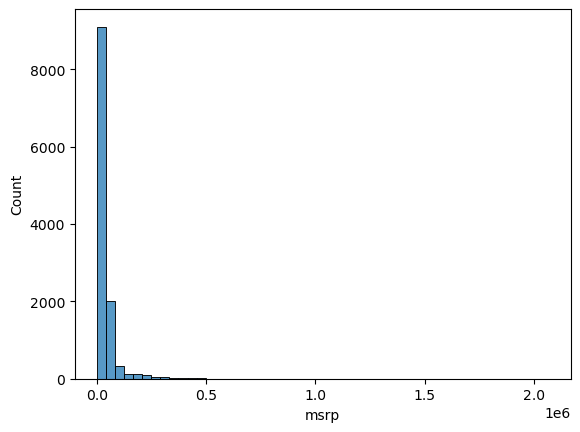

In [17]:
sns.histplot(df.msrp, bins=50) # the graph shows 50 boxes
plt.show()

The small data bins are not really visible. Let's take a look at the graph where the MSRP is concentrated.

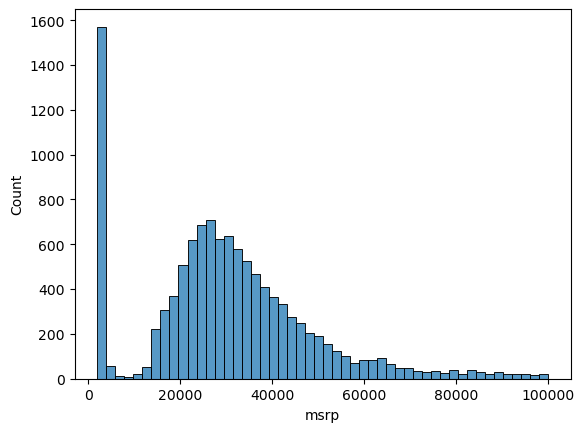

In [18]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)
plt.show()

From the histogram, we can observe a long tail distribution. This is not good for the resulting model.

Use log to make the data more compact.

In [19]:
np.log([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

array([ 0.        ,  2.30258509,  4.60517019,  6.90775528,  9.21034037,
       11.51292546, 13.81551056, 16.11809565])

Notice how the numbers are compact, even though they are numerically distant.

In [20]:
np.log1p([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]) # since log by zero is not allowed, use log1p by convention

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546, 13.81551156, 16.11809575])

In [21]:
np.log1p(df.msrp).describe() # np.log(x + 1)

count    11914.000000
mean        10.113729
std          1.105703
min          7.601402
25%          9.952325
50%         10.308819
75%         10.650939
max         14.541078
Name: msrp, dtype: float64

In [22]:
log_msrp = np.log1p(df.msrp)

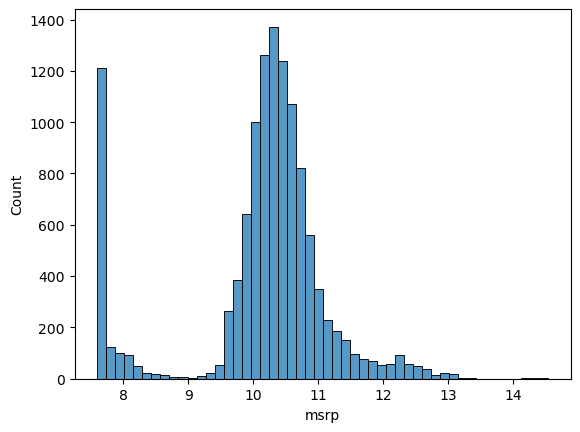

In [23]:
sns.histplot(log_msrp, bins=50)
plt.show()

The graph now resembles a normal distribution table. This shows that using the logarithm is effective in compacting the data.

### Missing values

In [24]:
df.isnull().sum() > 0

make                 False
model                False
year                 False
engine_fuel_type      True
engine_hp             True
engine_cylinders      True
transmission_type    False
driven_wheels        False
number_of_doors       True
market_category       True
vehicle_size         False
vehicle_style        False
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [25]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [26]:
df.columns[(df.isnull().sum() > 0)]

Index(['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'market_category'],
      dtype='object')

Keep in mind the missing values, as they can affect the training of the model

---

## 2.4 Setting up the validation framework

### Data splitting 

Split the data into training, val, and test: 60, 20, 20 respectively.

In [27]:
n = len(df)
n

11914

In [28]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [29]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [30]:
#loc is inclusive, use iloc
df_train = df.iloc[:n_train] 
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [31]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


### Data shuffling

In [32]:
idx = np.arange(n)

In [33]:
np.random.seed(3) # set a seed to make the data splitting reproducible
np.random.shuffle(idx)
idx

array([ 8929,  8806,  7233, ..., 11513,  1688,  5994])

In [34]:
# remember: df.iloc[ [10, 3, 5] ] returns rows at index 10, 3, 5
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [35]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8929,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870,2500
8806,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549,2000
7233,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26,2000
3535,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259,283900
8763,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,21499


The dataset is now shuffled, this prevents coincidences

### Deleting y-series from X

In [36]:
# Get the values only, we dont need the index
y_train = df_train.msrp.values
y_val = df_val.msrp.values
y_test = df_test.msrp.values

In [37]:
y_train

array([ 2500,  2000,  2000, ...,  2000, 21095, 29770], dtype=int64)

In [38]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

In [39]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Reset the index

In [40]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
8929,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870
8806,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549
7233,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26
3535,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259
8763,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385


In [41]:
df_train = df_train.reset_index(drop=True)

In [42]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870
1,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549
2,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26
3,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259
4,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,corvette,2017,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,25,16,1385
7146,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,21,873
7147,volvo,740,1990,regular_unleaded,114.0,4.0,manual,rear_wheel_drive,4.0,luxury,midsize,wagon,26,19,870
7148,dodge,dart,2016,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,39,27,1851


---

## 2.5 Linear Regression

In [43]:
xi = df_train.iloc[10] # take the 10th index for example
xi

make                            toyota
model                           sienna
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels          all_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         23
city_mpg                            16
popularity                        2031
Name: 10, dtype: object

### 1. Take the features

In [44]:
feature = xi[ ['engine_hp', 'city_mpg', 'popularity'] ].values
feature

array([266.0, 16, 2031], dtype=object)

### 2. Define weight

In [45]:
weight = [0.02, 0.01, 0.004]
w0 = 2.17

### 3. Build linear regression model

In [46]:
def linear_regression(xi):
    n = len(feature)
    pred = w0
    
    for i in range(n):
        pred = pred + feature[i] * weight[i]
    
    return pred 

In [47]:
y_pred = linear_regression(xi)
y_pred

15.774000000000001

### 4. Apply exponential on model's return value

In [48]:
y_pred

15.774000000000001

In [49]:
np.exp(y_pred)

7088611.215610923

In [50]:
np.log(np.exp(y_pred))

15.774000000000001

Use expm1 (-1) because we used log1p (+1).
They negate each other, giving the original final price

In [51]:
y_pred = np.expm1(y_pred) # np.exp(x) - 1
y_pred # y_pred is now the actual predicted car price ($)

7088610.215610923

In [52]:
y_pred = np.log1p(y_pred)
y_pred

15.774000000000001

---

## Linear Regression: Vector Form

In [53]:
xi = feature
xi

array([266.0, 16, 2031], dtype=object)

In [54]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [55]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for i in range(n):
        pred = pred + xi[i] * w[i]
    
    return pred 

In [56]:
linear_regression(xi)

14.532

In [57]:
w0 + xi.dot(w)

14.532

We can get the dot product of feature and weights, then add to biased term

In [58]:
def dot(xi, w):
    n = len(xi)
    prod = 0
    for i in range(n):
        prod = prod + xi[i] * w[i]
    return prod

In [59]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [60]:
linear_regression(xi)

14.532

In [61]:
xi

array([266.0, 16, 2031], dtype=object)

We can combine the w0 to the weights, should also append 1 to match the matrix size.

In [62]:
def linear_regression(xi):
    xi = [1] + list(xi)
    w_new = [w0] + w
    return dot(xi, w_new)

In [63]:
linear_regression(xi)

14.532

In [64]:
# the operands should be a python list to concatenate
[1] + list(xi)

[1, 266.0, 16, 2031]

In [65]:
[1] + xi

array([267.0, 17, 2032], dtype=object)

In [66]:
x1  = [148, 24, 1385]
x2  = [132, 25, 2031]
x10 = [453, 11, 86]
X = [x1, x2, x10]
X = np.array(X) # convert to np array to use the dot function
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86]])

In [67]:
w

[0.01, 0.04, 0.002]

In [68]:
def linear_regression(X, w):
    n = len(X)

    X_new = np.ones((n, X.shape[1] + 1))
    X_new[:, 1:] = X # selects all rows, starts from column 1 to end
    X = X_new
    X = np.array(X)
    w_new = [w0] + w

    return X.dot(w_new)

In [69]:
[w0] + w

[7.17, 0.01, 0.04, 0.002]

In [70]:
[1] + list(X[0])

[1, 148, 24, 1385]

In [71]:
# prediction for 3 cars
linear_regression(X, w)

array([12.38 , 13.552, 12.312])

In [72]:
np.array(x1).dot(w) + w0

12.379999999999999

In [73]:
np.array(x2).dot(w) + w0

13.552

In [74]:
np.array(x10).dot(w) + w0

12.312000000000001

---

## 2.7 Training Linear Regression: Normal Equation

In [75]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [76]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [77]:
def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full

In [78]:
train_linear_regression(X, y)

array([ 26.19943604, 306.12971274,   3.6929271 ])

In [79]:
def train_linear_regression(X, y):
    # To include the biased term in the calculation, add a column of 1's to the start of X.
    ones = np.ones(len(X))
    X = np.column_stack((ones, X))
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]

    return w0, w_full[1:]

In [80]:
train_linear_regression(X, y)

(30009.2529227667, array([ -22.78396914, -257.69087426,   -2.30322797]))

---

# 2.8 Baseline Model for Car Prediction

In [81]:
def train_linear_regression(X, y):
    # To include the biased term in the calculation, add a column of 1's to the start of X.
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]

    return w0, w_full[1:]

In [82]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870
1,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549
2,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26
3,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259
4,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,corvette,2017,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,25,16,1385
7146,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,21,873
7147,volvo,740,1990,regular_unleaded,114.0,4.0,manual,rear_wheel_drive,4.0,luxury,midsize,wagon,26,19,870
7148,dodge,dart,2016,regular_unleaded,160.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,39,27,1851


In [83]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [84]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [85]:
# lets take only these fields, for demonstration
X_col = [ 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]
X_train = df_train[X_col].values
X_train

array([[1.900e+02, 5.000e+00, 2.400e+01, 1.700e+01, 8.700e+02],
       [1.050e+02, 4.000e+00, 2.500e+01, 2.100e+01, 5.490e+02],
       [2.250e+02, 6.000e+00, 2.600e+01, 1.700e+01, 2.600e+01],
       ...,
       [1.140e+02, 4.000e+00, 2.600e+01, 1.900e+01, 8.700e+02],
       [1.600e+02, 4.000e+00, 3.900e+01, 2.700e+01, 1.851e+03],
       [2.600e+02, 6.000e+00, 2.400e+01, 1.600e+01, 5.657e+03]])

In [86]:
y_train

array([ 2500,  2000,  2000, ...,  2000, 21095, 29770], dtype=int64)

In [87]:
X_train.shape[0], y_train.shape[0]

(7150, 7150)

Training with missing values results with nan.

In [88]:
train_linear_regression(X_train, y_train) 

(nan, array([nan, nan, nan, nan, nan]))

In [89]:
df_train[X_col].isnull().sum()

engine_hp           37
engine_cylinders    17
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

Fill the null with zero for now, this is not the best practice

In [90]:
df_train[X_col].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [91]:
X_train = df_train[X_col].fillna(0).values

In [92]:
w0, w = train_linear_regression(X_train, y_train)

In [93]:
w0, w

(-105628.05992446431,
 array([ 3.19947488e+02,  6.91025776e+03,  5.07109695e+02,  9.68049921e+02,
        -3.05310628e+00]))

We have now trained a model, since we already found the values for weights

Compare the predictions to the target value.

In [94]:
y_pred = w0 + X_train.dot(w)

In [97]:
y_pred

array([ 15684.53040942, -13061.90730323,  37383.99133202, ...,
       -12591.41717894,  13467.89539087,  29407.84260504])

In [98]:
y_train

array([ 2500,  2000,  2000, ...,  2000, 21095, 29770], dtype=int64)

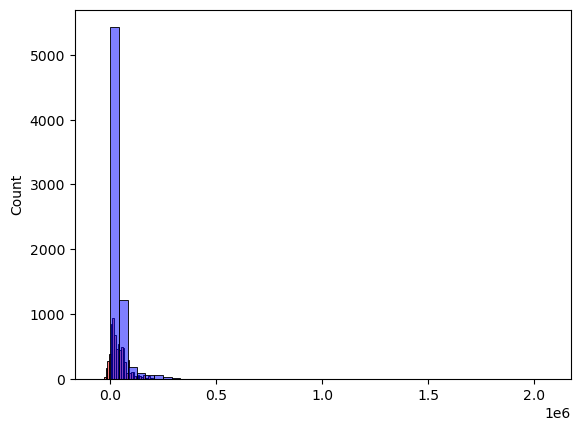

In [99]:
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_train, bins=50, color='blue', alpha=0.5)
plt.show()